In [34]:
import numpy as np

import matplotlib.pyplot as plt

#ln(N/N0)=-(mu)x
N0=955.5
al_ar=[706,644.6,536.5,492.5]
co_ar=[606.5,305,280.5,126.5]
pb_ar=[635,447,151.5,30]
x_arr=[1.25,2.5,3.75,5.]
al_arry=np.array(al_ar)/N0
co_arry=np.array(co_ar)/N0
pb_arry=np.array(pb_ar)/N0


def my_fun(inter_mu,name):
    
    inter=inter_mu[0]
    mu=inter_mu[1]
    
    N0=955.5
    al_ar=[706,644.6,536.5,492.5]
    co_ar=[606.5,305,280.5,126.5]
    pb_ar=[635,447,151.5,30]
    x_arr=[1.25,2.5,3.75,5.]
    al_arry=np.array(al_ar)/N0
    co_arry=np.array(co_ar)/N0
    pb_arry=np.array(pb_ar)/N0

    al_uncer=[12,41.5,35.5,24.5]
    co_uncer=[26.5,10,22.5,5.5]
    pb_uncer=[28,37,36.5,5]


    chi_al=0
    chi_cu=0
    chi_pb=0
    
    x_arr=np.array(x_arr)
    
    exps=-1*np.array(x_arr)*mu+inter
    model_ar=np.exp(exps)*N0
    
    for i in range(0,4):
        chi_al+=((model_ar[i]-al_ar[i])**2)/((al_uncer[i])**2)
        chi_cu+=((model_ar[i]-co_ar[i])**2)/((co_uncer[i])**2)
        chi_pb+=((model_ar[i]-pb_ar[i])**2)/((pb_uncer[i])**2)
    

    if name=="al":
        #     print("Aluminmum")
        #     print("model_ar")
        #     print(model_ar)
        #     plt.scatter(x_arr,al_ar,color="green")
        #     plt.scatter(x_arr,model_ar)
        result=chi_al
        
    if name=="cu":
        result= chi_cu
    if name == "pb":
        result = chi_pb

    return result
    


z=my_fun(inter_mu=[0.58685351, 0.76121527],name="pb")

print(z)

32.39105770927085


In [35]:
import scipy

x0=(0.030507091908313133,0.18274111)

print(scipy.optimize.minimize(my_fun,x0,method="SLSQP",args="al"))
print(" ")
#print("Al Chi^2 minimization: chi^2=1.1003383527890525, intercept=0.04061259, mu=0.18592093")

     fun: 0.4570719279427194
     jac: array([0.00026643, 0.00188535])
 message: 'Optimization terminated successfully'
    nfev: 37
     nit: 8
    njev: 8
  status: 0
 success: True
       x: array([-0.17961334,  0.09787749])
 


<ipython-input-34-967078a76afe>:42: RuntimeWarning: overflow encountered in exp
  model_ar=np.exp(exps)*N0


In [36]:
#CU

# Co
# coefficient of determination: 0.9994298103749627
# intercept: -0.09235162350447212
# slope: [-0.52362879]

x0=(-0.09235162350447212,0.52362879)
print(scipy.optimize.minimize(my_fun,x0,method="SLSQP",args="cu"))

print()

#print("Cu Chi^2 minimization: chi^2=0.3696422948282022, intercept=-0.08923204, mu=0.5221143")

     fun: 25.08636815323057
     jac: array([-0.01311493,  0.01723194])
 message: 'Optimization terminated successfully'
    nfev: 36
     nit: 9
    njev: 9
  status: 0
 success: True
       x: array([-0.07454777,  0.39304469])



<ipython-input-34-967078a76afe>:42: RuntimeWarning: overflow encountered in exp
  model_ar=np.exp(exps)*N0
<ipython-input-34-967078a76afe>:45: RuntimeWarning: overflow encountered in double_scalars
  chi_al+=((model_ar[i]-al_ar[i])**2)/((al_uncer[i])**2)
<ipython-input-34-967078a76afe>:46: RuntimeWarning: overflow encountered in double_scalars
  chi_cu+=((model_ar[i]-co_ar[i])**2)/((co_uncer[i])**2)
<ipython-input-34-967078a76afe>:47: RuntimeWarning: overflow encountered in double_scalars
  chi_pb+=((model_ar[i]-pb_ar[i])**2)/((pb_uncer[i])**2)


In [37]:
# Pb
# coefficient of determination: 0.9950631284701559
# intercept: -0.44618841333140113
# slope: [-0.62738051]

x0=(0.58685351, 0.76121527)
print(scipy.optimize.minimize(my_fun,x0,method="SLSQP",args="pb"))

print()

#print("Pb Chi^2 minimization: chi^2=2.7533458484907465, intercept=-0.08923204, mu=0.5221143")


     fun: 32.33882453193915
     jac: array([ 0.01004267, -0.03010368])
 message: 'Optimization terminated successfully'
    nfev: 19
     nit: 4
    njev: 4
  status: 0
 success: True
       x: array([0.58026561, 0.75476968])



In [38]:
N0=955.5
al_ar=[706,644.6,536.5,492.5]
co_ar=[606.5,305,280.5,126.5]
pb_ar=[635,447,151.5,30]
x_arr=[1.25,2.5,3.75,5.]
al_arry=np.array(al_ar)/N0
co_arry=np.array(co_ar)/N0
pb_arry=np.array(pb_ar)/N0

al_uncer=[12,41.5,35.5,24.5]
co_uncer=[26.5,10,22.5,5.5]
pb_uncer=[28,37,36.5,5]


new_x=np.arange(0,5.5,step=0.1)


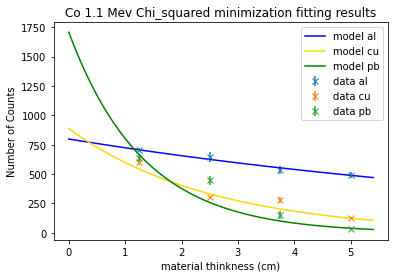

In [39]:
inter=-0.17961334
mu=0.09787749
exps=-1*np.array(new_x)*mu+inter
model_ar=np.exp(exps)*N0

plt.errorbar(x_arr,al_ar,yerr=al_uncer,fmt='x',label="data al")
plt.plot(new_x,model_ar,label="model al",color="blue")
plt.legend()

inter=-0.07454777
mu=0.39304469
exps=-1*np.array(new_x)*mu+inter
model_ar=np.exp(exps)*N0

plt.errorbar(x_arr,co_ar,yerr=co_uncer,fmt='x',label="data cu")
plt.plot(new_x,model_ar,label="model cu",color="gold")
plt.legend()

inter=0.58026561
mu=0.75476968
exps=-1*np.array(new_x)*mu+inter
model_ar=np.exp(exps)*N0

plt.errorbar(x_arr,pb_ar,yerr=pb_uncer,fmt='x',label="data pb")
plt.plot(new_x,model_ar,label="model pb",color="green")
plt.legend()

plt.title("Co 1.1 Mev Chi_squared minimization fitting results")
plt.ylabel("Number of Counts")
plt.xlabel("material thinkness (cm)")
plt.show()


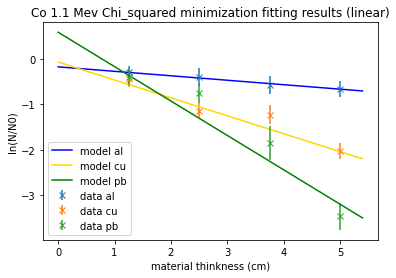

In [40]:
al_arryy=np.log(np.array(al_ar)/N0)
co_arryy=np.log(np.array(co_ar)/N0)
pb_arryy=np.log(np.array(pb_ar)/N0)

N0_uncer=125.5


al_uncerr=[]
co_uncerr=[]
pb_uncerr=[]

for i in range(0,4):
    
    em_perc=N0_uncer/N0
    
    al_perc=al_uncer[i]/al_ar[i]
    
    #https://openbooks.library.umass.edu/p132-lab-manual/chapter/uncertainty-for-natural-logarithms/
    
    #(al_perc+em_perc)*(al_ar[i]/N0)/(al_ar[i]/N0)
    
    
    al_uncerr.append((al_perc+em_perc))
    
    co_perc=co_uncer[i]/co_ar[i]
    co_uncerr.append((co_perc+em_perc))
    
    pb_perc=pb_uncer[i]/pb_ar[i]
    pb_uncerr.append((pb_perc+em_perc))
    

inter=-0.17961334
mu=0.09787749
model_ar=-1*np.array(new_x)*mu+inter


plt.errorbar(x_arr,al_arryy,yerr=al_uncerr,fmt='x',label="data al")
#plt.scatter(x_arr,al_arryy)
plt.plot(new_x,model_ar,label="model al",color="blue")
plt.legend()

inter=-0.07454777
mu=0.39304469
model_ar=-1*np.array(new_x)*mu+inter

plt.errorbar(x_arr,co_arryy,yerr=co_uncerr,fmt='x',label="data cu")
#plt.scatter(x_arr,co_arryy)
plt.plot(new_x,model_ar,label="model cu",color="gold")
plt.legend()

inter=0.58026561
mu=0.75476968
model_ar=-1*np.array(new_x)*mu+inter

plt.errorbar(x_arr,pb_arryy,yerr=pb_uncerr,fmt='x',label="data pb")
#plt.scatter(x_arr,pb_arryy)
plt.plot(new_x,model_ar,label="model pb",color="green")
plt.legend()

plt.title("Co 1.1 Mev Chi_squared minimization fitting results (linear)")
plt.ylabel("ln(N/N0)")
plt.xlabel("material thinkness (cm)")
plt.show()

